# [MARKETING ANALYTICS] DATA UNDERSTANDING


**OBJETIVO DO PROJETO:**

O principal objetivo deste projeto é aumentar a eficácia das campanhas de marketing do banco.

**PREMISSAS:**

1. A análise considera apenas pessoas físicas, excluindo contas corporativas ou jurídicas.
2. Apenas clientes contactados durante a campanha mais recente são incluídos na análise, excluindo dados de campanhas anteriores.
3. Consideram-se apenas os contatos feitos via telefone celular e telefone fixo, excluindo outros meios de contato.


**FONTES INFORMACIONAIS:**

1. Dados das campanhas de marketing direto realizadas pelo banco, disponíveis no Bank Marketing Dataset da UCI Machine Learning Repository.
2. Indicadores econômicos, como taxa de variação de emprego, índice de preços ao consumidor, índice de confiança do consumidor e taxa Euribor de 3 meses.



**OBJETIVO(S) DO SCRIPT:**

O trabalho está seguindo a metodologia CRISP-DM e este script corresponde a fase de Data Understanding.

1. Carregamento dos dados brutos.
2. Realizar análise de qualidade para verificar integridade e consistência.
3. Conduzir análises exploratórias para entender padrões e responder hipóteses.





## 1. BIBLIOTECAS E CONFIGURAÇÕES



### 1.1 BIBLIOTECAS

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

### 1.2 CONFIGURAÇÕES

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
warnings.filterwarnings('ignore')
sns.set_palette("muted")

### 1.3 FUNÇÕES

In [3]:
def exibir_valores_ausentes(df):
    """
    Exibe as colunas de um DataFrame que possuem valores ausentes.

    A função calcula a quantidade absoluta e a porcentagem de valores ausentes
    em cada coluna do DataFrame fornecido e exibe apenas as colunas que têm valores ausentes.
    A exibição é ordenada pela porcentagem de valores ausentes em ordem decrescente,
    com a porcentagem formatada para duas casas decimais.

    Parâmetros:
    df (pandas.DataFrame): O DataFrame a ser analisado.

    Retorna:
    None: Esta função não retorna nada. Ela imprime a quantidade e a porcentagem de valores ausentes.
    """
    # Calcular a quantidade absoluta de valores ausentes em cada coluna
    valores_ausentes = df.isna().sum()

    # Calcular a porcentagem de valores ausentes em cada coluna
    porcentagem_ausentes = (valores_ausentes / len(df)) * 100

    # Criar um DataFrame combinando a quantidade absoluta e a porcentagem de valores ausentes
    valores_ausentes_df = pd.DataFrame({
        'Quantidade Ausente': valores_ausentes,
        'Porcentagem Ausente (%)': porcentagem_ausentes
    })

    # Filtrar o DataFrame para mostrar apenas as colunas com valores ausentes
    valores_ausentes_df = valores_ausentes_df[valores_ausentes_df['Quantidade Ausente'] > 0]

    # Ordenar pela coluna de porcentagem ausente em ordem decrescente
    valores_ausentes_df = valores_ausentes_df.sort_values(by='Porcentagem Ausente (%)', ascending=False)

    # Formatando a porcentagem para mostrar apenas duas casas decimais
    valores_ausentes_df['Porcentagem Ausente (%)'] = valores_ausentes_df['Porcentagem Ausente (%)'].apply(lambda x: f"{x:.2f}")

    # Exibir o DataFrame resultante
    display(valores_ausentes_df)

In [4]:
def exibir_valores_unicos(df):
    """
    Exibe a quantidade absoluta e relativa de valores únicos em cada coluna de um DataFrame.

    A função calcula a quantidade absoluta e relativa (em porcentagem) de valores únicos
    (excluindo nulos) em cada coluna do DataFrame fornecido e exibe essa informação formatada.
    A exibição é ordenada pela quantidade absoluta de valores únicos em ordem decrescente.

    Parâmetros:
    df (pandas.DataFrame): O DataFrame a ser analisado.

    Retorna:
    None: Esta função não retorna nada. Ela imprime a quantidade absoluta e relativa de valores únicos por coluna.
    """
    # Calcular a quantidade de valores únicos (sem contar nulos) em cada coluna
    valores_unicos_absolutos = df.nunique(dropna=True)

    # Calcular a porcentagem de valores únicos (sem contar nulos) em cada coluna
    total_linhas = len(df)
    valores_unicos_relativos = (valores_unicos_absolutos / total_linhas) * 100

    # Criar um DataFrame para armazenar a quantidade absoluta e relativa de valores únicos
    valores_unicos_df = pd.DataFrame({
        'Quantidade Valores Únicos': valores_unicos_absolutos,
        'Porcentagem Valores Únicos (%)': valores_unicos_relativos
    })

    # Ordenar pelo número absoluto de valores únicos em ordem decrescente
    valores_unicos_df = valores_unicos_df.sort_values(by='Quantidade Valores Únicos', ascending=False)

    # Exibir o DataFrame resultante
    display(valores_unicos_df)

In [5]:
def categorize_generation(age):
    """
    Categoriza a geração com base na idade do usuário em 2010.

    Parâmetros:
    age (int): Idade do usuário em 2010.

    Retorna:
    str: Geração correspondente à idade fornecida.
    """
    if age <= 13:
        return 'Gen_Z'
    elif 14 <= age <= 29:
        return 'Gen_Y'
    elif 30 <= age <= 45:
        return 'Gen_X'
    elif 46 <= age <= 64:
        return 'Gen_Boomer'
    else:
        return 'Gen_Silent'

## 2. LEITURA DOS DADOS





In [6]:
df = pd.read_csv('https://raw.githubusercontent.com/manuelcalcada/marketing-analytics/main/1.%20dataset/bank-additional-full.csv', sep = ';', low_memory=False, na_values=['unknown', 999, -1, 'nonexistent'])
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,149.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307.0,1,NaN,0,NaN,1.1,93.994,-36.4,4.857,5191.0,no


### DICIONÁRIO DE DADOS

| Nº | Atributo | Tipo | Descrição |
|----|----------|------|-----------|
| 1  | age | numérico | Idade |
| 2  | job | categórico | Tipo de trabalho ("admin.","blue-collar","entrepreneur","housemaid","management","retired","self-employed","services","student","technician","unemployed") |
| 3  | marital | categórico | Estado civil ("divorced","married","single") |
| 4  | education | categórico | Educação ("basic.4y","basic.6y","basic.9y","high.school","illiterate","professional.course","university.degree") |
| 5  | default | categórico | Tem crédito inadimplente? ("no","yes") |
| 6  | housing | categórico | Tem empréstimo habitacional? ("no","yes") |
| 7  | loan | categórico | Tem empréstimo pessoal? ("no","yes") |
| 8  | contact | categórico | Tipo de comunicação de contato ("cellular","telephone") |
| 9  | month | categórico | Mês do último contato do ano ("jan", "feb", "mar", ..., "nov", "dec") |
| 10 | day_of_week | categórico | Dia da semana do último contato ("mon","tue","wed","thu","fri") |
| 11 | duration | numérico | Duração do último contato, em segundos. Nota: esse atributo afeta altamente o alvo de saída (por exemplo, se duration=0, então y="no") |
| 12 | campaign | numérico | Número de contatos realizados durante esta campanha para este cliente (inclui o último contato) |
| 13 | pdays | numérico | Número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior |
| 14 | previous | numérico | Número de contatos realizados antes desta campanha para este cliente |
| 15 | poutcome | categórico | Resultado da campanha de marketing anterior ("failure","success") |
| 16 | emp.var.rate | numérico | Taxa de variação do emprego - indicador trimestral |
| 17 | cons.price.idx | numérico | Índice de preços ao consumidor - indicador mensal |
| 18 | cons.conf.idx | numérico | Índice de confiança do consumidor - indicador mensal |
| 19 | euribor3m | numérico | Taxa Euribor de 3 meses - indicador diário |
| 20 | nr.employed | numérico | Número de empregados - indicador trimestral |
| 21 | y | binário | O cliente subscreveu um depósito a prazo? ("yes","no") |


## 3. ANÁLISE DE QUALIDADE DOS DADOS


### 3.1 INFORMAÇÕES BÁSICAS

In [7]:
#tipos das variáveis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             40858 non-null  object 
 2   marital         41108 non-null  object 
 3   education       39457 non-null  object 
 4   default         32591 non-null  object 
 5   housing         40198 non-null  object 
 6   loan            40198 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41186 non-null  float64
 11  campaign        41188 non-null  int64  
 12  pdays           1515 non-null   float64
 13  previous        41188 non-null  int64  
 14  poutcome        5625 non-null   object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [8]:
print(f"O dataset contém {df.shape[0]} linhas e {df.shape[1]} colunas.")

O dataset contém 41188 linhas e 21 colunas.


### 3.2 DADOS AUSENTES

In [9]:
#verificando a quantidade de dados ausentes
exibir_valores_ausentes(df)

,Quantidade Ausente,Porcentagem Ausente (%)
pdays,39673,96.32
poutcome,35563,86.34
default,8597,20.87
education,1731,4.20
housing,990,2.40
loan,990,2.40
job,330,0.80
marital,80,0.19
duration,2,0.00


### 3.3 VALORES ÚNICOS

In [10]:
#verificando a quantidade de valores únicos por variável
exibir_valores_unicos(df)

,Quantidade Valores Únicos,Porcentagem Valores Únicos (%)
duration,1543,3.746237
euribor3m,316,0.767214
age,78,0.189376
campaign,42,0.101971
pdays,26,0.063125
cons.conf.idx,26,0.063125
cons.price.idx,26,0.063125
nr.employed,11,0.026707
job,11,0.026707
month,10,0.024279


As variáveis **pdays** e **poutcome** possuem valor ausente para clientes que não foram contatados anteriormente, então a alta quantidade de dados nulos não é um ofensor para a análise.

As outras variáveis, exceto **default**, possuem poucos dados ausentes que serão tratados posteriormente na preparação dos dados, porém para a análise exploratória, as categóricas receberão categoria 'NA'.

Nenhuma variável possui um valor único.

In [11]:
df[['default', 'education', 'housing', 'loan', 'job', 'marital']] = df[['default', 'education', 'housing', 'loan', 'job', 'marital']].fillna('NA')

## 4. VARIÁVEIS DERIVADAS

In [12]:
#estatísticas descritivas das variáveis numéricas para suportar a construção de variáveis derivadas
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.024060,10.421250,17.000,32.000,38.000,47.000,98.000
duration,41186.0,258.249041,259.234158,0.000,102.000,180.000,319.000,4918.000
campaign,41188.0,2.567593,2.770014,1.000,1.000,2.000,3.000,56.000
pdays,1515.0,6.014521,3.824906,0.000,3.000,6.000,7.000,27.000
previous,41188.0,0.172963,0.494901,0.000,0.000,0.000,0.000,7.000
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


In [13]:
df.describe(include=['object', 'category']).T

,count,unique,top,freq
job,41188,12,admin.,10422
marital,41188,4,married,24928
education,41188,8,university.degree,12168
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950
contact,41188,2,cellular,26144
month,41188,10,may,13769
day_of_week,41188,5,thu,8623
poutcome,5625,2,failure,4252


### 4.1 GERAÇÃO

In [14]:
df['generation'] = df['age'].apply(categorize_generation)
df['generation'] = df['generation'].fillna('NA')
df['generation'].value_counts()

generation
Gen_X         23688
Gen_Boomer    11168
Gen_Y          5669
Gen_Silent      663
Name: count, dtype: int64

### 4.2 CATEGORIA DO TRABALHO

In [15]:
job_categories = {
    'admin.': 'Profissionais de Escritório',
    'management': 'Profissionais de Escritório',
    'technician': 'Profissionais de Escritório',
    'blue-collar': 'Trabalhadores Manuais',
    'services': 'Trabalhadores Manuais',
    'housemaid': 'Trabalhadores Manuais',
    'self-employed': 'Autônomos',
    'entrepreneur': 'Autônomos',
    'unemployed': 'Não Empregados',
    'retired': 'Não Empregados',
    'student': 'Não Empregados'
}

df['job_category'] = df['job'].map(job_categories)
df['job_category'] = df['job_category'].fillna('NA')
df['job_category'].value_counts()

job_category
Profissionais de Escritório    20089
Trabalhadores Manuais          14283
Não Empregados                  3609
Autônomos                       2877
NA                               330
Name: count, dtype: int64

### 4.3 CATEGORIA DE ESCOLARIDADE

In [16]:
education_categories = {
    'university.degree': 'Ensino Superior',
    'high.school': 'Ensino Médio',
    'basic.4y': 'Educação Básica',
    'basic.6y': 'Educação Básica',
    'basic.9y': 'Educação Básica',
    'illiterate': 'Educação Básica',
    'professional.course': 'Profissionalizante'
}

df['education_category'] = df['education'].map(education_categories)
df['education_category'] = df['education_category'].fillna('NA')
df['education_category'].value_counts()

education_category
Educação Básica       12531
Ensino Superior       12168
Ensino Médio           9515
Profissionalizante     5243
NA                     1731
Name: count, dtype: int64

## 5. ANÁLISE EXPLORATÓRIA

### 5.1 HIPÓTESES

Com base no entendimento do problema e no comportamento que queremos modelar, foram levantadas as seguintes hipóteses:


| Grupo                  | Hipótese                                                                                                                                          |
|-----------------------|---------------------------------------------------------------------------------------------------------------------------------------------------|
| Demografia            | Clientes mais jovens (idade < 30) têm maior probabilidade de subscrever um depósito a prazo.                                                      |
|                       | Clientes aposentados ou estudantes têm maior probabilidade de subscrever um depósito a prazo.                                                     |
|                       | Clientes solteiros têm menor probabilidade de subscrever um depósito a prazo em comparação com clientes casados.                                  |
| Socioeconômico        | Clientes sem crédito em default têm maior probabilidade de subscrever um depósito a prazo.                                                        |
|                       | Clientes com formação superior e profissional têm maior probabilidade de subscrever um depósito a prazo.                                                        |
|                       | Clientes que possuem empréstimo para habitação ou pessoal têm menor probabilidade de subscrever um depósito a prazo.                                         |
| Comunicação           | Clientes que foram contactados via celular têm maior probabilidade de subscrever um depósito a prazo do que aqueles contactados via telefone.     |
|                       | Contatos realizados durante meses específicos têm maior taxa de sucesso na subscrição de depósitos a prazo.                    |
| Histórico de Campanha | Clientes que foram contactados mais de uma vez durante a campanha têm maior probabilidade de subscrever um depósito a prazo.                       |
|                       | Clientes que tiveram sucesso em campanhas anteriores têm maior probabilidade de subscrever um depósito a prazo novamente.                          |
|                       | Clientes que não foram contactados anteriormente têm menor probabilidade de subscrever um depósito a prazo.                           |
| Indicadores Econômicos| Períodos com taxa de variação de emprego positiva têm maior taxa de subscrição de depósitos a prazo.                                              |
|                       | Altos índices de confiança do consumidor estão associados a uma maior probabilidade de subscrição de depósitos a prazo.                            |
|                       | Altas taxas Euribor de 3 meses estão negativamente correlacionadas com a subscrição de depósitos a prazo.                                          |


### 5.2 ANÁLISE DA CAMPANHA

### Introdução

Na análise da efetividade da campanha, examinamos três KPIs principais para entender o desempenho e impacto das ações de marketing:

1. **Conversão por Cliente**: Este KPI mede a taxa de clientes que realizaram a subscrição de depósitos a prazo em relação ao total de clientes contactados. Este indicador é fundamental para avaliar a eficácia da campanha em converter leads em clientes ativos.

2. **Conversão por Chamada**: Este KPI avalia a taxa de sucesso de cada chamada feita durante a campanha. Ele mede a eficiência do contato individual, permitindo identificar a eficácia dos métodos de abordagem utilizados pelos representantes de vendas.

3. **Contact Rate**: Este KPI mede a proporção de clientes contactados em relação ao total de leads disponíveis. Ele ajuda a determinar o alcance da campanha e a eficiência das estratégias de contato empregadas.

Analisando esses KPIs, podemos obter insights sobre a performance da campanha, identificar áreas de melhoria e ajustar as estratégias de marketing para otimizar os resultados futuros.

In [17]:
#tabela de frequências
freq_table = df['y'].value_counts().reset_index()
freq_table.columns = ['Resposta', 'Contagem']
freq_table['Percentual'] = round((freq_table['Contagem'] / len(df)) * 100,2)

display(freq_table)

,Resposta,Contagem,Percentual
0,no,36548,88.73
1,yes,4640,11.27


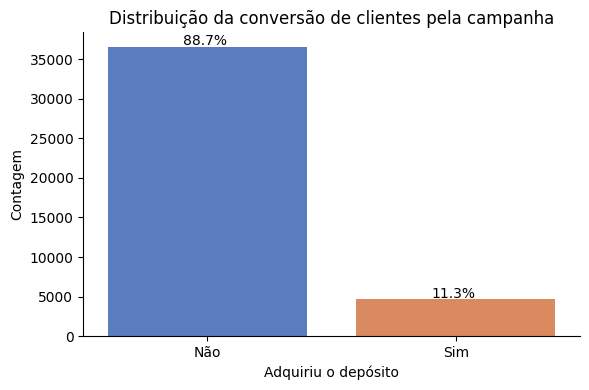

In [18]:
#gráfico da distribuição da variável dependente
plt.figure(figsize=(6, 4))
ax = sns.countplot(x='y', data=df, hue='y', legend=False)

total = len(df)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2 - 0.1
    y = p.get_height() + 200
    ax.annotate(percentage, (x, y))

ax.set_title('Distribuição da conversão de clientes pela campanha')
ax.set_xlabel('Adquiriu o depósito')
ax.set_ylabel('Contagem')
plt.xticks([0, 1], ['Não', 'Sim'])
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

In [19]:
#contact rate
df.campaign.count()/df.campaign.sum()

0.38946990184768426

In [20]:
#conversão por chamada
df[df['y'] == 'yes'].shape[0]/df.campaign.sum()

0.043875408967982296

In [21]:
#retorno financeiro da campanha
(df[df['y'] == 'yes'].shape[0]*200) - (df.campaign.sum() * 0.05)

922712.3

In [22]:
#tabela de frequência para o mês da campanha
df_month = pd.crosstab(df['month'], df['y'])
df_month['Total'] = df_month['no'] + df_month['yes']
df_month['%'] = round((df_month['yes'] / df_month['Total']) * 100, 2)

month_mapping = {
    'jan': '1 - jan',
    'feb': '2 - feb',
    'mar': '3 - mar',
    'apr': '4 - apr',
    'may': '5 - may',
    'jun': '6 - jun',
    'jul': '7 - jul',
    'aug': '8 - aug',
    'sep': '9 - sep',
    'oct': '10 - oct',
    'nov': '11 - nov',
    'dec': '12 - dec'
}

df_month.index = df_month.index.map(month_mapping)
ordered_months = ['1 - jan', '2 - feb', '3 - mar', '4 - apr', '5 - may', '6 - jun', '7 - jul', '8 - aug', '9 - sep', '10 - oct', '11 - nov', '12 - dec']
df_month = df_month.reindex(ordered_months)

print('Tabela de frequência para o mês:\n')
display(df_month)

Tabela de frequência para o mês:



y,no,yes,Total,%
month,,,,
1 - jan,NaN,NaN,NaN,NaN
2 - feb,NaN,NaN,NaN,NaN
3 - mar,270.0,276.0,546.0,50.55
4 - apr,2093.0,539.0,2632.0,20.48
5 - may,12883.0,886.0,13769.0,6.43
6 - jun,4759.0,559.0,5318.0,10.51
7 - jul,6525.0,649.0,7174.0,9.05
8 - aug,5523.0,655.0,6178.0,10.60
9 - sep,314.0,256.0,570.0,44.91


In [23]:
#estatísticas descritivas da tabela de frequências mensal
df_month[['no','yes','Total']].describe().T

,count,mean,std,min,25%,50%,75%,max
y,,,,,,,,
no,10.0,3654.8,4033.549878,93.0,336.25,2889.0,5332.0,12883.0
yes,10.0,464.0,237.388102,89.0,285.75,477.5,626.5,886.0
Total,10.0,4118.8,4252.745513,182.0,607.00,3366.5,5963.0,13769.0


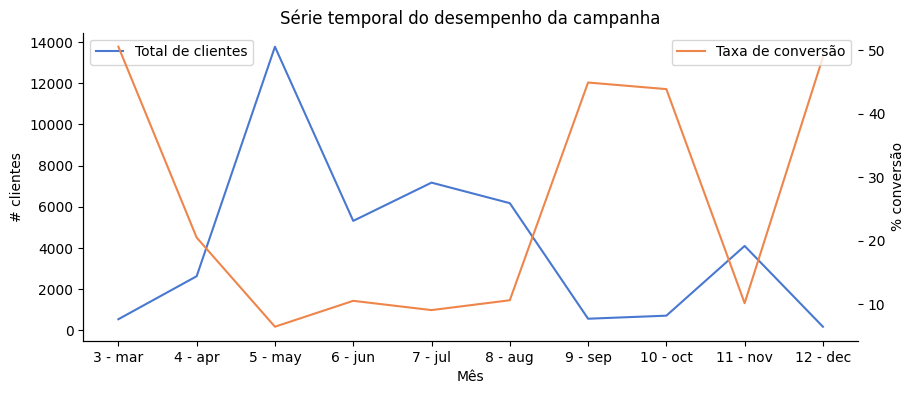

In [24]:
#gráfico de análise da campanha por mês
fig, ax1 = plt.subplots(figsize=(10, 4))
sns.lineplot(data=df_month, x=df_month.index, y='Total', ax=ax1, label='Total de clientes', color='#4878CF')

ax2 = ax1.twinx()
sns.lineplot(data=df_month, x=df_month.index, y='%', ax=ax2, label='Taxa de conversão', color='#EE854A')

ax1.set_xlabel('Mês')
ax1.set_ylabel('# clientes')
ax2.set_ylabel('% conversão')
plt.title('Série temporal do desempenho da campanha')

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
sns.despine(left=False, bottom=False)

plt.show()

In [25]:
#tabela de frequência para o dia da semana da campanha
df_day_of_week = pd.crosstab(df['day_of_week'], df['y'])
df_day_of_week['Total'] = df_day_of_week['no'] + df_day_of_week['yes']
df_day_of_week['%'] = round((df_day_of_week['yes'] / df_day_of_week['Total']) * 100, 2)

days_mapping = {
    'mon': '1 - mon',
    'tue': '2 - tue',
    'wed': '3 - wed',
    'thu': '4 - thu',
    'fri': '5 - fri'
}

df_day_of_week.index = df_day_of_week.index.map(days_mapping)
ordered_days = ['1 - mon', '2 - tue', '3 - wed', '4 - thu', '5 - fri']
df_day_of_week = df_day_of_week.reindex(ordered_days)

print('Tabela de frequência para o dia da semana:\n')
display(df_day_of_week)

Tabela de frequência para o dia da semana:



y,no,yes,Total,%
day_of_week,,,,
1 - mon,7667,847,8514,9.95
2 - tue,7137,953,8090,11.78
3 - wed,7185,949,8134,11.67
4 - thu,7578,1045,8623,12.12
5 - fri,6981,846,7827,10.81


In [34]:
days_of_week_order = ['mon', 'tue', 'wed', 'thu', 'fri']

df_marital_day_of_week = pd.crosstab([df['marital'], df['day_of_week']], df['y'])
df_marital_day_of_week['Total'] = df_marital_day_of_week['no'] + df_marital_day_of_week['yes']
df_marital_day_of_week['%'] = round((df_marital_day_of_week['yes'] / df_marital_day_of_week['Total']) * 100, 2)

df_marital_day_of_week = df_marital_day_of_week.reset_index()
df_marital_day_of_week['day_of_week'] = pd.Categorical(df_marital_day_of_week['day_of_week'], categories=days_of_week_order, ordered=True)
df_marital_day_of_week = df_marital_day_of_week.sort_values(['marital', 'day_of_week'])
df_marital_day_of_week = df_marital_day_of_week.set_index(['marital', 'day_of_week'])

print('Tabela de frequência de conversão por dia da semana para cada estado civil:\n')
display(df_marital_day_of_week)

Tabela de frequência de conversão por dia da semana para cada estado civil:



y                       no  yes  Total      %
marital  day_of_week                         
NA       mon            16    3     19  15.79
         tue            11    0     11   0.00
         wed            10    4     14  28.57
         thu            21    3     24  12.50
         fri            10    2     12  16.67
divorced mon           891   95    986   9.63
         tue           857  104    961  10.82
         wed           808   94    902  10.42
         thu           817   98    915  10.71
         fri           763   85    848  10.02
married  mon          4720  474   5194   9.13
         tue          4390  516   4906  10.52
         wed          4358  532   4890  10.88
         thu          4579  568   5147  11.04
         fri          4349  442   4791   9.23
single   mon          2040  275   2315  11.88
         tue          1879  333   2212  15.05
         wed          2009  319   2328  13.70
         thu          2161  376   2537  14.82
         fri          1859  317   2176  14.57

In [37]:
days_of_week_order = ['mon', 'tue', 'wed', 'thu', 'fri']

df_job_category_day_of_week = pd.crosstab([df['job_category'], df['day_of_week']], df['y'])
df_job_category_day_of_week['Total'] = df_job_category_day_of_week['no'] + df_job_category_day_of_week['yes']
df_job_category_day_of_week['%'] = round((df_job_category_day_of_week['yes'] / df_job_category_day_of_week['Total']) * 100, 2)
df_job_category_day_of_week = df_job_category_day_of_week.reset_index()
df_job_category_day_of_week['day_of_week'] = pd.Categorical(df_job_category_day_of_week['day_of_week'], categories=days_of_week_order, ordered=True)
df_job_category_day_of_week = df_job_category_day_of_week.sort_values(['job_category', 'day_of_week'])
df_job_category_day_of_week = df_job_category_day_of_week.set_index(['job_category', 'day_of_week'])

print('Tabela de frequência de conversão por dia da semana para cada categoria de trabalho:\n')
display(df_job_category_day_of_week)

Tabela de frequência de conversão por dia da semana para cada categoria de trabalho:



y                                          no  yes  Total      %
job_category                day_of_week                         
Autônomos                   mon           580   52    632   8.23
                            tue           468   51    519   9.83
                            wed           467   51    518   9.85
                            thu           591   67    658  10.18
                            fri           498   52    550   9.45
NA                          mon            75    3     78   3.85
                            tue            67    7     74   9.46
                            wed            58   12     70  17.14
                            thu            62    9     71  12.68
                            fri            31    6     37  16.22
Não Empregados              mon           573  148    721  20.53
                            tue           563  187    750  24.93
                            wed           509  190    699  27.18
                            thu           569  175    744  23.52
                            fri           542  153    695  22.01
Profissionais de Escritório mon          3717  458   4175  10.97
                            tue          3459  486   3945  12.32
                            wed          3429  474   3903  12.14
                            thu          3676  558   4234  13.18
                            fri          3398  434   3832  11.33
Trabalhadores Manuais       mon          2722  186   2908   6.40
                            tue          2580  222   2802   7.92
                            wed          2722  222   2944   7.54
                            thu          2680  236   2916   8.09
                            fri          2512  201   2713   7.41

In [38]:
df_education_category_day_of_week = pd.crosstab([df['education_category'], df['day_of_week']], df['y'])
df_education_category_day_of_week['Total'] = df_education_category_day_of_week['no'] + df_education_category_day_of_week['yes']
df_education_category_day_of_week['%'] = round((df_education_category_day_of_week['yes'] / df_education_category_day_of_week['Total']) * 100, 2)
df_education_category_day_of_week = df_education_category_day_of_week.reset_index()
df_education_category_day_of_week['day_of_week'] = pd.Categorical(df_education_category_day_of_week['day_of_week'], categories=days_of_week_order, ordered=True)
df_education_category_day_of_week = df_education_category_day_of_week.sort_values(['education_category', 'day_of_week'])
df_education_category_day_of_week = df_education_category_day_of_week.set_index(['education_category', 'day_of_week'])

print('Tabela de frequência de conversão por dia da semana para cada categoria de educação:\n')
display(df_education_category_day_of_week)

Tabela de frequência de conversão por dia da semana para cada categoria de educação:



y                                 no  yes  Total      %
education_category day_of_week                         
Educação Básica    mon          2315  192   2507   7.66
                   tue          2238  242   2480   9.76
                   wed          2373  231   2604   8.87
                   thu          2356  233   2589   9.00
                   fri          2156  195   2351   8.29
Ensino Médio       mon          1850  187   2037   9.18
                   tue          1692  182   1874   9.71
                   wed          1668  229   1897  12.07
                   thu          1621  231   1852  12.47
                   fri          1653  202   1855  10.89
Ensino Superior    mon          2248  323   2571  12.56
                   tue          1970  337   2307  14.61
                   wed          2036  325   2361  13.77
                   thu          2263  395   2658  14.86
                   fri          1981  290   2271  12.77
NA                 mon           304   42    346  12.14
                   tue           295   53    348  15.23
                   wed           233   54    287  18.82
                   thu           319   49    368  13.32
                   fri           329   53    382  13.87
Profissionalizante mon           950  103   1053   9.78
                   tue           942  139   1081  12.86
                   wed           875  110    985  11.17
                   thu          1019  137   1156  11.85
                   fri           862  106    968  10.95

#### RESULTADO FÍSICO
A campanha de marketing obteve uma taxa de conversão de aproximadamente 11% do público-alvo, o que equivale a cerca de 4,6 mil clientes, demonstrando uma eficácia significativa em atrair e converter um segmento considerável de potenciais consumidores.

Apesar da taxa de conversão de chamadas ser de 4%, indicando uma taxa mais baixa de sucesso nas interações diretas, o contact rate de 39% revela que uma proporção considerável das tentativas de contato foram efetivas, refletindo uma boa taxa de resposta e alcance entre o público-alvo.

Ao analisar por período, observamos uma média de 4,2 mil clientes impactados mensalmente pela campanha, com picos em maio, julho, agosto e novembro. No entanto, a taxa de conversão mostrou um comportamento inverso, sugerindo que o aumento no número de contatos não resultou em uma melhoria qualitativa nos resultados. Isso indica que uma otimização do público-alvo pode ser benéfica.

Para finalizar, a taxa de conversão por dia da semana não apresentou uma variação significativa de forma geral e aberta por estado civil, emprego e educação.







#### RESULTADO FINANCEIRO
Estimando que o custo médio de uma chamada de televendas seja de 0,05 euros e que o depósito mínimo realizado pelo cliente seja de 200 euros, o retorno financeiro mínimo dessa ação foi de 923 mil euros em custódia pelo banco.

### 5.3 DEMOGRAFIA

### Introdução

Na análise demográfica, examinamos três variáveis principais sobre o perfil dos clientes analisados:

1. **Idade e Geração**: As variáveis idade (age) e geração (generation) revelam a distribuição etária e os padrões de idade dentro do grupo. Analisar essas variáveis nos permite entender melhor a composição demográfica dos leads e identificar quais faixas etárias e gerações respondem mais efetivamente às campanhas de marketing.

2. **Profissão e Categoria de Trabalho**: As variáveis profissão (job) e categoria de trabalho (job_category) destacam as ocupações predominantes e os setores de atividade dos indivíduos. Esta análise é essencial para identificar quais segmentos profissionais são mais propensos a responder positivamente à campanha e ajustar as estratégias de marketing de acordo.

3. **Estado Civil**: A variável estado civil (marital) oferece informações sobre o status de relacionamento dos participantes, influenciando decisões comportamentais e financeiras. Compreender o estado civil dos leads pode ajudar a personalizar abordagens de marketing e identificar padrões de conversão entre diferentes grupos de relacionamento.

Analisando essas variáveis demográficas, podemos obter insights sobre o perfil dos clientes, o que é fundamental para a segmentação e personalização das campanhas de marketing, aumentando assim a sua eficácia e taxa de conversão.

#### 5.3.1 ESTATÍSTICAS DESCRITIVAS


In [ ]:
df[['age']].describe().T

,count,mean,std,min,25%,50%,75%,max
age,41188.0,40.02406,10.42125,17.0,32.0,38.0,47.0,98.0


In [ ]:
df[['generation', 'job', 'job_category', 'marital']].describe(include=['object', 'category']).T

,count,unique,top,freq
generation,41188,4,Gen_X,23688
job,41188,12,admin.,10422
job_category,41188,5,Profissionais de Escritório,20089
marital,41188,4,married,24928


#### 5.3.2 ANÁLISES UNIVARIADAS





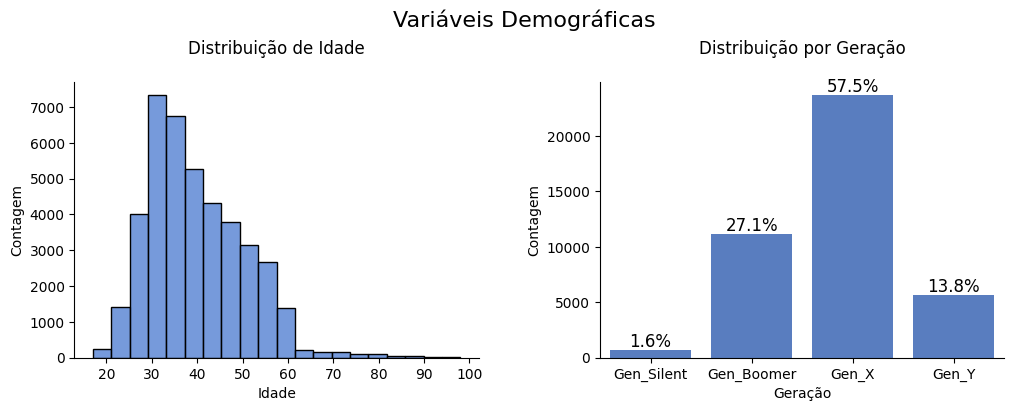

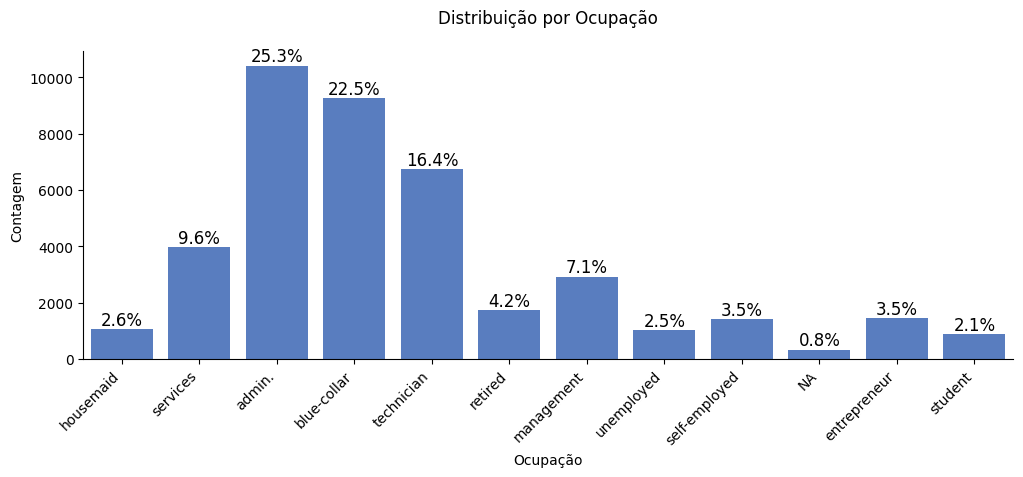

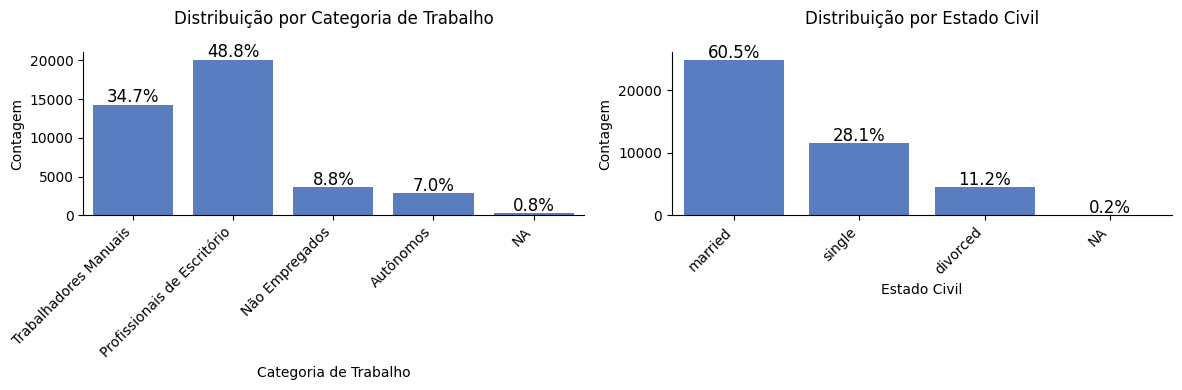

In [ ]:
#gráficos univariados de demografia
#primeira linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1 = sns.histplot(df['age'], bins=20, kde=False, ax=axs[0])
ax1.set_title('Distribuição de Idade', pad=20)
ax1.set_xlabel('Idade')
ax1.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

generation_order = ['Gen_Silent', 'Gen_Boomer', 'Gen_X', 'Gen_Y']
ax2 = sns.countplot(x='generation', data=df, ax=axs[1], order = generation_order)
ax2.set_title('Distribuição por Geração', pad=20)
ax2.set_xlabel('Geração')
ax2.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

total_gen = len(df['generation'])
for p in ax2.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_gen)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 300
    ax2.annotate(percentage, (x, y), ha='center', fontsize=12)

fig.suptitle('Variáveis Demográficas', fontsize=16)
fig.subplots_adjust(hspace=0.8, wspace=0.3, top=0.8)

#segunda linha
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
ax3 = sns.countplot(x='job', data=df)
ax3.set_title('Distribuição por Ocupação', pad=20)
ax3.set_xlabel('Ocupação')
ax3.set_ylabel('Contagem')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)

total_job = len(df['job'])
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_job)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 150
    ax3.annotate(percentage, (x, y), ha='center', fontsize=12)

#terceira_linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax4 = sns.countplot(x='job_category', data=df, ax=axs[0])
ax4.set_title('Distribuição por Categoria de Trabalho', pad=20,)
ax4.set_xlabel('Categoria de Trabalho')
ax4.set_ylabel('Contagem')
ax4.set_xticklabels(ax4.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)

total_job_cat = len(df['job_category'])
for p in ax4.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_job_cat)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 300
    ax4.annotate(percentage, (x, y), ha='center', fontsize=12)

ax5 = sns.countplot(x='marital', data=df, ax=axs[1])
ax5.set_title('Distribuição por Estado Civil', pad=20)
ax5.set_xlabel('Estado Civil')
ax5.set_ylabel('Contagem')
ax5.set_xticklabels(ax5.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)

total_marital = len(df['marital'])
for p in ax5.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_marital)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 300
    ax5.annotate(percentage, (x, y), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

#### 5.3.3 ANÁLISES BIVARIADAS


In [ ]:
df['Adquiriu'] = df['y'].replace({'no': 'Não', 'yes': 'Sim'})

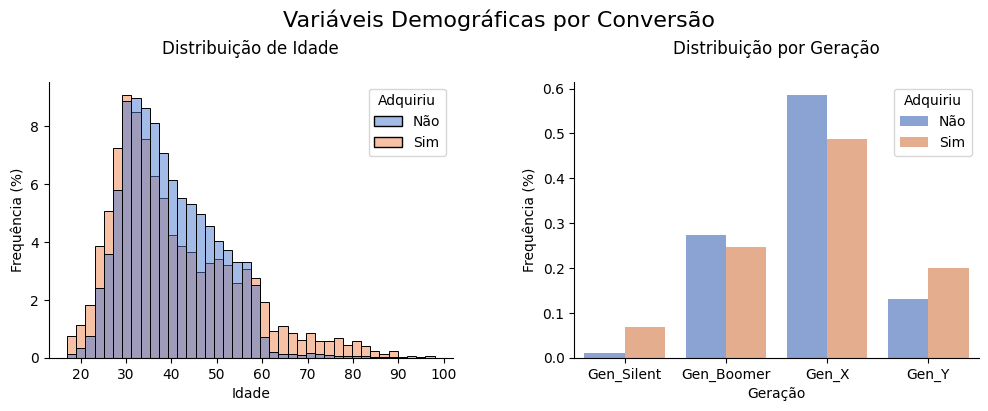

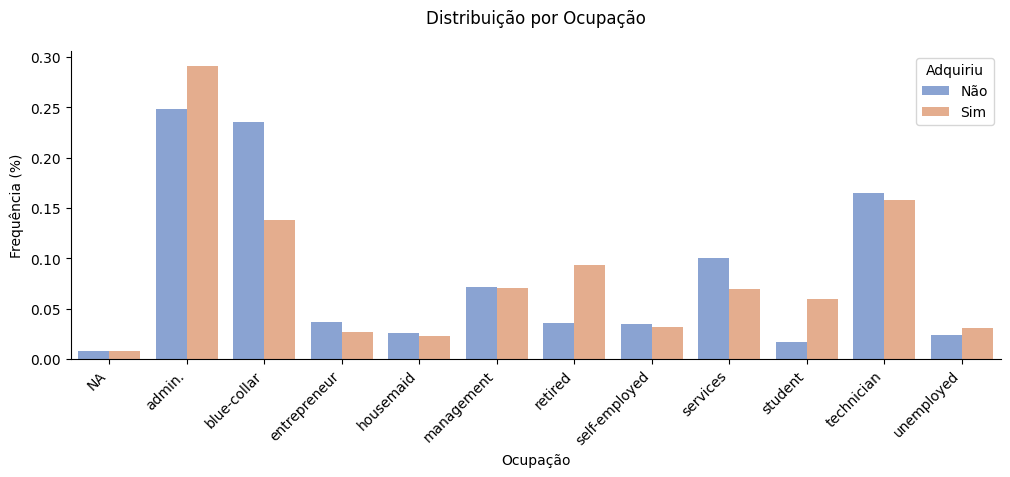

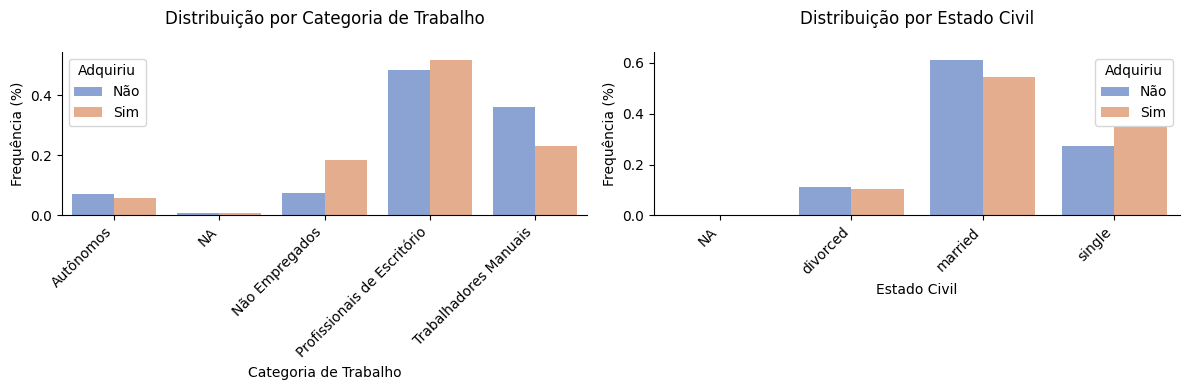

In [ ]:
#graficos bivariados de demografia
#primeira linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

ax1 = sns.histplot(data=df, x='age', bins=40, hue='Adquiriu', stat="percent", common_norm=False, ax=axs[0])
ax1.set_title('Distribuição de Idade', pad=20)
ax1.set_xlabel('Idade')
ax1.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)

generation_order = ['Gen_Silent', 'Gen_Boomer', 'Gen_X', 'Gen_Y']
freq = (df.groupby(['generation','Adquiriu']).size() / df.groupby(['Adquiriu']).size()).reset_index().rename({0:'Frequência'}, axis=1)
ax2 = sns.barplot(x='generation', hue='Adquiriu', y='Frequência', data=freq, alpha=0.7,  order = generation_order, ax=axs[1])
ax2.set_title('Distribuição por Geração', pad=20)
ax2.set_xlabel('Geração')
ax2.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)

fig.suptitle('Variáveis Demográficas por Conversão', fontsize=16)
fig.subplots_adjust(hspace=0.8, wspace=0.3, top=0.8)

#segunda linha
fig, axs = plt.subplots(1, 1, figsize=(12, 4))

freq = (df.groupby(['job','Adquiriu']).size() / df.groupby(['Adquiriu']).size()).reset_index().rename({0:'Frequência'}, axis=1)
ax3 = sns.barplot(x='job', hue='Adquiriu', y='Frequência', data=freq, alpha=0.7)
ax3.set_title('Distribuição por Ocupação', pad=20)
ax3.set_xlabel('Ocupação')
ax3.set_ylabel('Frequência (%)')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)
fig.subplots_adjust(hspace=.5)

#terceira linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

freq = (df.groupby(['job_category','Adquiriu']).size() / df.groupby(['Adquiriu']).size()).reset_index().rename({0:'Frequência'}, axis=1)
ax3 = sns.barplot(x='job_category', hue='Adquiriu', y='Frequência', data=freq, alpha=0.7, ax=axs[0])
ax3.set_title('Distribuição por Categoria de Trabalho', pad=20)
ax3.set_xlabel('Categoria de Trabalho')
ax3.set_ylabel('Frequência (%)')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)
fig.subplots_adjust(hspace=.5)

freq = (df.groupby(['marital','Adquiriu']).size() / df.groupby(['Adquiriu']).size()).reset_index().rename({0:'Frequência'}, axis=1)
ax3 = sns.barplot(x='marital', hue='Adquiriu', y='Frequência', data=freq, alpha=0.7, ax=axs[1])
ax3.set_title('Distribuição por Estado Civil', pad=20)
ax3.set_xlabel('Estado Civil')
ax3.set_ylabel('Frequência (%)')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)
fig.subplots_adjust(hspace=.5)

plt.tight_layout()
plt.show()

#### 5.3.4 RESULTADOS

#### Idade
A análise demográfica revela que a campanha de marketing tem maior concentração de pessoas mais jovens. O histograma da distribuição de idade está deslocado para a esquerda, com uma média de idade de 40 anos e o terceiro quartil em 47 anos. A faixa etária dos leads varia entre 17 e 98 anos, destacando um maior enfoque nos indivíduos em idade produtiva.

A análise de conversão da campanha mostra que houve um desempenho proporcionalmente melhor em leads mais jovens, principalmente da Geração Y. Curiosamente, a campanha também teve um bom desempenho com leads acima de 60 anos, apesar dessas faixas etárias representar uma menor proporção da base total.

A maioria dos clientes contactados pertence à Geração X, seguida pelos Baby Boomers. Esta distribuição sugere um foco significativo em indivíduos de meia-idade.

#### Ocupação
A maior parte dos clientes potenciais contactados trabalha em funções administrativas, seguidos por trabalhadores manuais, técnicos e trabalhadores de serviços. Este perfil ocupacional pode refletir uma estratégia de segmentação baseada na estabilidade e renda potencial dos leads.

A campanha teve maior sucesso entre clientes que trabalham em escritórios, especialmente aqueles em funções administrativas. Além disso, aposentados, estudantes e desempregados também apresentaram boas taxas de conversão. A relação entre aposentados e estudantes com as faixas etárias mais jovens e mais velhas, que tiveram melhor desempenho, reforça a necessidade de uma abordagem segmentada.

#### Estado Civil
Cerca de 60% dos leads são casados, seguidos por 28% solteiros e 11% divorciados. A predominância de indivíduos casados pode indicar uma tentativa de atrair clientes com maior estabilidade financeira e responsabilidades familiares.

O melhor desempenho de conversão foi observado entre os solteiros. Este insight pode ser utilizado para ajustar e otimizar futuras campanhas, direcionando esforços adicionais para este segmento.



### 5.4 SOCIOECONÔMICO

### Introdução

Na análise socioeconômica, examinamos quatro variáveis principais sobre o perfil dos clientes analisados:

1. **Nível Educacional**: As variáveis educação (education) e categoria da educação (education_category) destacam o nível educacional predominante do grupo. Analisar esses dados nos ajuda a entender a formação acadêmica dos leads e identificar como o nível educacional influencia a resposta à campanha.

2. **Inadimplência Anterior**: A variável inadimplência (default) revela se o cliente possui alguma inadimplência anterior. Esta informação é essencial para avaliar o risco de crédito e a probabilidade de conversão dos leads em clientes que realizam depósitos a prazo.

3. **Empréstimos Pessoais**: A variável empréstimos pessoais (loan) oferece informações sobre os produtos de crédito adquiridos anteriormente pelos clientes. Entender o histórico de empréstimos pessoais dos leads pode fornecer insights sobre seu comportamento financeiro e sua disposição em adquirir novos produtos bancários.

4. **Empréstimos Habitacionais**: A variável empréstimos habitacionais (housing) oferece informações sobre os produtos habitacionais adquiridos anteriormente pelos clientes. Esta análise é crucial para identificar padrões de comportamento entre os leads que possuem empréstimos habitacionais e sua propensão a responder positivamente à campanha.

Analisando essas variáveis socioeconômicas, podemos obter insights sobre o perfil financeiro dos clientes, o que é fundamental para a segmentação e personalização das campanhas de marketing, aumentando assim sua eficácia e taxa de conversão.

#### 5.4.1 ESTATÍSTICAS DESCRITIVAS

In [ ]:
df[['education', 'education_category', 'default', 'housing', 'loan']].describe().T

,count,unique,top,freq
education,41188,8,university.degree,12168
education_category,41188,5,Educação Básica,12531
default,41188,3,no,32588
housing,41188,3,yes,21576
loan,41188,3,no,33950


#### 5.4.2 ANÁLISES UNIVARIADAS

In [ ]:
df.education_category.unique()

array(['Educação Básica', 'Ensino Médio', 'Profissionalizante', 'NA',
       'Ensino Superior'], dtype=object)

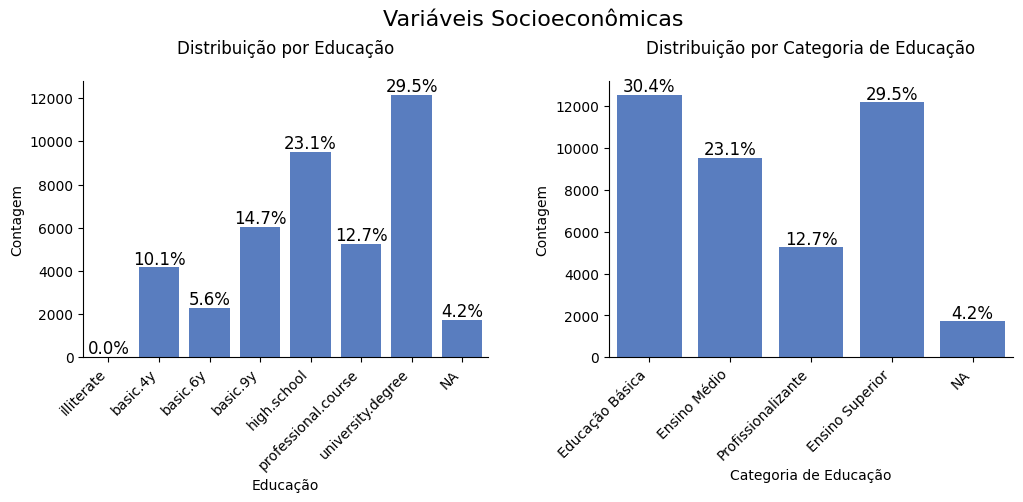

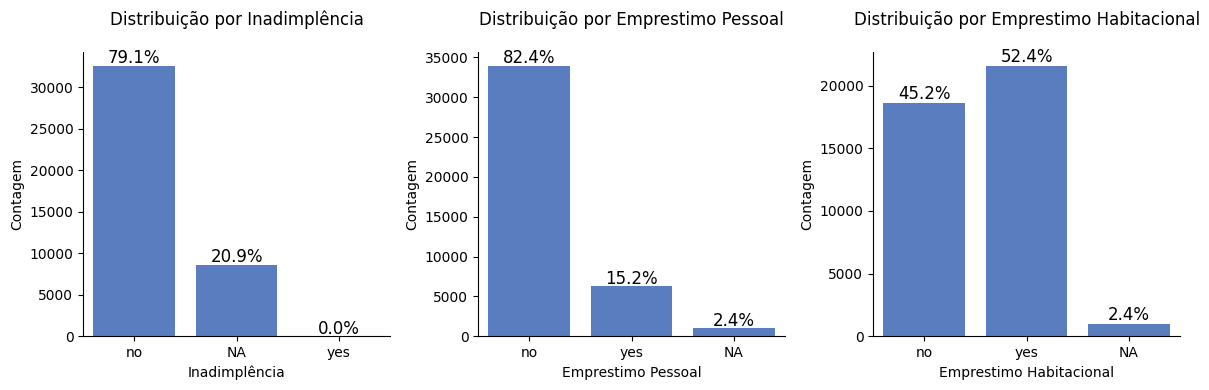

In [ ]:
#gráficos univariados de demografia
#primeira linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
order = ['illiterate', 'basic.4y','basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'NA' ]
ax3 = sns.countplot(x='education', data=df, ax=axs[0], order = order)
ax3.set_title('Distribuição por Educação', pad=20)
ax3.set_xlabel('Educação')
ax3.set_ylabel('Contagem')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)

total_education = len(df['education'])
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_education)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 150
    ax3.annotate(percentage, (x, y), ha='center', fontsize=12)

order = ['Educação Básica', 'Ensino Médio', 'Profissionalizante', 'Ensino Superior', 'NA']
ax3 = sns.countplot(x='education_category', data=df, ax=axs[1], order = order)
ax3.set_title('Distribuição por Categoria de Educação', pad=20)
ax3.set_xlabel('Categoria de Educação')
ax3.set_ylabel('Contagem')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)

total_education_category = len(df['education_category'])
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_education_category)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 150
    ax3.annotate(percentage, (x, y), ha='center', fontsize=12)

fig.suptitle('Variáveis Socioeconômicas', fontsize=16)
fig.subplots_adjust(hspace=0.8, wspace=0.3, top=0.8)

#segunda linha
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
ax4 = sns.countplot(x='default', data=df, ax=axs[0])
ax4.set_title('Distribuição por Inadimplência', pad=20,)
ax4.set_xlabel('Inadimplência')
ax4.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

total_default = len(df['default'])
for p in ax4.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_default)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 300
    ax4.annotate(percentage, (x, y), ha='center', fontsize=12)

ax5 = sns.countplot(x='loan', data=df, ax=axs[1])
ax5.set_title('Distribuição por Emprestimo Pessoal', pad=20)
ax5.set_xlabel('Emprestimo Pessoal')
ax5.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

total_loan = len(df['loan'])
for p in ax5.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_loan)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 300
    ax5.annotate(percentage, (x, y), ha='center', fontsize=12)

ax5 = sns.countplot(x='housing', data=df, ax=axs[2])
ax5.set_title('Distribuição por Emprestimo Habitacional', pad=20)
ax5.set_xlabel('Emprestimo Habitacional')
ax5.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

total_housing = len(df['housing'])
for p in ax5.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_housing)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 300
    ax5.annotate(percentage, (x, y), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

#### 5.4.3 ANÁLISES BIVARIADAS

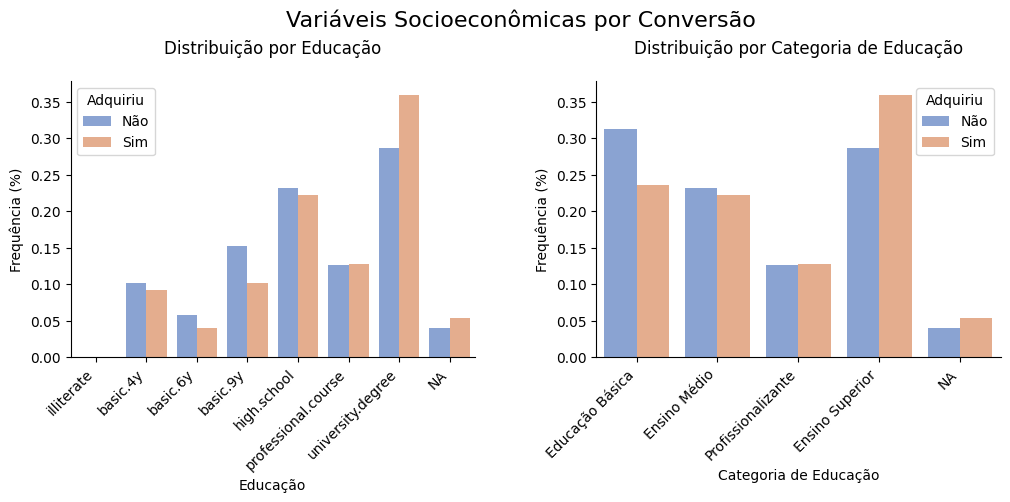

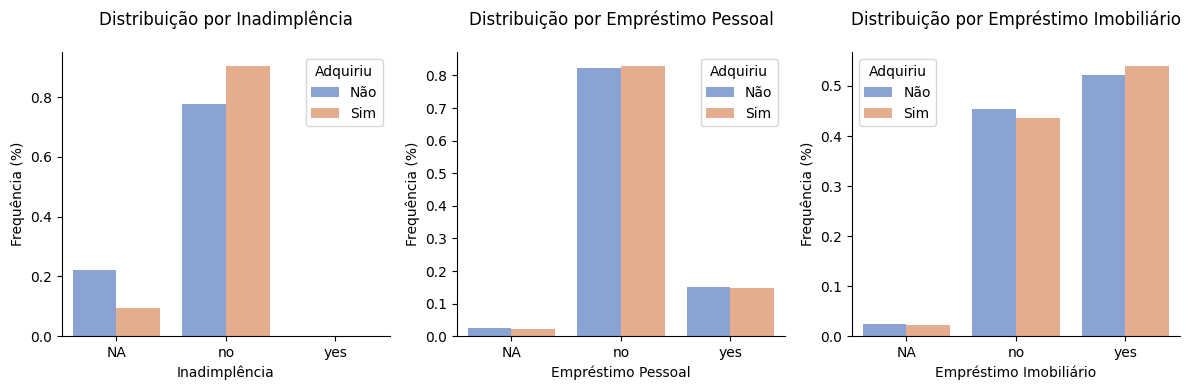

In [ ]:
#graficos bivariados de socioeconômicas
#primeira linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))

order = ['illiterate', 'basic.4y','basic.6y', 'basic.9y', 'high.school', 'professional.course', 'university.degree', 'NA' ]
freq = (df.groupby(['education','Adquiriu']).size() / df.groupby(['Adquiriu']).size()).reset_index().rename({0:'Frequência'}, axis=1)
ax2 = sns.barplot(x='education', hue='Adquiriu', y='Frequência', data=freq, alpha=0.7,  order = order, ax=axs[0])
ax2.set_title('Distribuição por Educação', pad=20)
ax2.set_xlabel('Educação')
ax2.set_ylabel('Frequência (%)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)

order = ['Educação Básica', 'Ensino Médio', 'Profissionalizante', 'Ensino Superior', 'NA']
freq = (df.groupby(['education_category','Adquiriu']).size() / df.groupby(['Adquiriu']).size()).reset_index().rename({0:'Frequência'}, axis=1)
ax2 = sns.barplot(x='education_category', hue='Adquiriu', y='Frequência', data=freq, alpha=0.7,  order = order, ax=axs[1])
ax2.set_title('Distribuição por Categoria de Educação', pad=20)
ax2.set_xlabel('Categoria de Educação')
ax2.set_ylabel('Frequência (%)')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)

fig.suptitle('Variáveis Socioeconômicas por Conversão', fontsize=16)
fig.subplots_adjust(hspace=0.8, wspace=0.3, top=0.8)

#segunda linha
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

freq = (df.groupby(['default','Adquiriu']).size() / df.groupby(['Adquiriu']).size()).reset_index().rename({0:'Frequência'}, axis=1)
ax3 = sns.barplot(x='default', hue='Adquiriu', y='Frequência', data=freq, alpha=0.7, ax=axs[0])
ax3.set_title('Distribuição por Inadimplência', pad=20)
ax3.set_xlabel('Inadimplência')
ax3.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)
fig.subplots_adjust(hspace=.5)

freq = (df.groupby(['loan','Adquiriu']).size() / df.groupby(['Adquiriu']).size()).reset_index().rename({0:'Frequência'}, axis=1)
ax3 = sns.barplot(x='loan', hue='Adquiriu', y='Frequência', data=freq, alpha=0.7, ax=axs[1])
ax3.set_title('Distribuição por Empréstimo Pessoal', pad=20)
ax3.set_xlabel('Empréstimo Pessoal')
ax3.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)
fig.subplots_adjust(hspace=.5)

freq = (df.groupby(['housing','Adquiriu']).size() / df.groupby(['Adquiriu']).size()).reset_index().rename({0:'Frequência'}, axis=1)
ax3 = sns.barplot(x='housing', hue='Adquiriu', y='Frequência', data=freq, alpha=0.7, ax=axs[2])
ax3.set_title('Distribuição por Empréstimo Imobiliário', pad=20)
ax3.set_xlabel('Empréstimo Imobiliário')
ax3.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)
fig.subplots_adjust(hspace=.5)

plt.tight_layout()
plt.show()

#### 5.4.4 RESULTADOS

#### Educação
A base de leads é razoavelmente balanceada em termos de nível educacional. Cerca de 30,4% dos leads possuem educação básica, 29,5% possuem ensino superior, 23,1% possuem ensino médio, e 12,7% têm educação profissionalizante.

Apesar dessa distribuição equilibrada, a campanha apresentou maior sucesso entre os indivíduos com ensino superior, que constituíram a maioria das conversões. Por outro lado, os leads com educação básica apresentaram o pior desempenho em termos de conversão. Aqueles com educação profissionalizante tiveram uma taxa de conversão ligeiramente maior do que a taxa de não conversão, o que pode corroborar que a campanha teve mais sucesso em um público de maior renda.

#### Empréstimo Pessoal
A grande maioria dos leads não possui empréstimo pessoal e a análise mostra que ter ou não ter esse tipo de empréstimo não demonstrou uma correlação significativa com a decisão de adquirir o depósito a termo.

#### Empréstimo Habitacional
No caso dos empréstimos habitacionais, 52,4% dos leads possuem essa modalidade e há uma ligeira tendência de melhor conversão entre os leads que possuem esse tipo de empréstimo. Este dado sugere que esses indivíduos podem estar em uma situação financeira estável e são mais propensos a considerar novos produtos financeiros.

#### Inadimplência
A análise da inadimplência é complexa devido à escassez de casos e ao elevado número de dados ausentes. A maioria dos leads não está inadimplente, mas os leads com dados ausentes sobre inadimplência apresentam uma taxa de conversão pior do que aqueles sabidamente sem inadimplência. Esta observação pode indicar que os leads com dados ausentes têm, na verdade, uma probabilidade maior de serem inadimplentes.

### 5.5 COMUNICAÇÃO

Na análise de comunicação, examinamos duas variáveis principais para entender o perfil dos clientes analisados e a penetração da campanha:

1. **Contato**: O tipo de contato (contact) informa se o contato da campanha foi feito para um telefone fixo ou móvel do lead. Analisar essa variável nos ajuda a entender quais canais de comunicação são mais eficazes na conversão dos leads.

2. **Mês e Dia de Contato**: O mês e dia de contato podem estar relacionados a uma conversão maior. Entretanto, essa análise já foi feita anteriormente quando analisamos os resultados da campanha de forma geral. Esta variável pode ajudar a identificar padrões temporais de resposta e otimizar o timing das futuras campanhas de marketing.

Estudando essas variáveis de comunicação, podemos obter insights sobre a eficácia dos diferentes canais de contato e os melhores momentos para abordar os leads, contribuindo para a melhoria contínua das estratégias de marketing.

#### 5.5.1 ESTATÍSTICAS DESCRITIVAS

In [ ]:
df.contact.describe().T

count        41188
unique           2
top       cellular
freq         26144
Name: contact, dtype: object

#### 5.5.2 ANÁLISES UNIVARIADAS

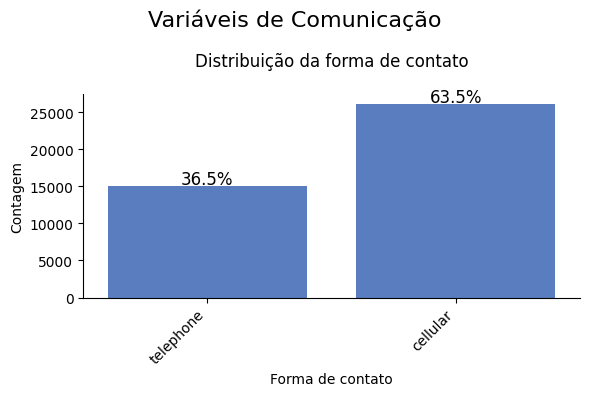

In [ ]:
#gráficos univariados de comunicação
#primeira linha
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
ax3 = sns.countplot(x='contact', data=df)
ax3.set_title('Distribuição da forma de contato', pad=20)
ax3.set_xlabel('Forma de contato')
ax3.set_ylabel('Contagem')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)

total_contact = len(df['contact'])
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_contact)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 300
    ax3.annotate(percentage, (x, y), ha='center', fontsize=12)

fig.suptitle('Variáveis de Comunicação', fontsize=16)
fig.subplots_adjust(hspace=0.8, wspace=0.3, top=0.8)

plt.tight_layout()
plt.show()

#### 5.5.3 ANÁLISES BIVARIADAS

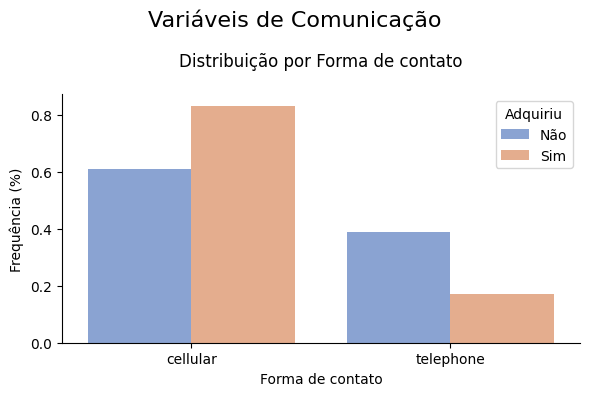

In [ ]:
#gráficos bivariados de comunicação
#primeira linha
fig, axs = plt.subplots(1, 1, figsize=(6, 4))
freq = (df.groupby(['contact','Adquiriu']).size() / df.groupby(['Adquiriu']).size()).reset_index().rename({0:'Frequência'}, axis=1)
ax3 = sns.barplot(x='contact', hue='Adquiriu', y='Frequência', data=freq, alpha=0.7)
ax3.set_title('Distribuição por Forma de contato', pad=20)
ax3.set_xlabel('Forma de contato')
ax3.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)
fig.subplots_adjust(hspace=.5)

fig.suptitle('Variáveis de Comunicação', fontsize=16)
fig.subplots_adjust(hspace=0.8, wspace=0.3, top=0.8)

plt.tight_layout()
plt.show()

#### 5.5.4 RESULTADOS

A análise das variáveis relacionadas ao tipo de contato na campanha de marketing revela insights significativos sobre a eficácia dos métodos de contato utilizados.

##### Tipo de Contato
Entre os leads contactados, 63,5% foram abordados via celular, enquanto 36,5% foram contatados por telefone fixo. Esta distribuição sugere uma preferência ou maior acessibilidade dos leads pelo uso de dispositivos móveis.

##### Eficácia do Contato
A campanha demonstrou um grande sucesso quando o contato foi realizado por celular, em contraste com o desempenho observado nos contatos feitos por telefone fixo. Este comportamento pode estar relacionado a características demográficas e socioeconômicas dos leads.

Indivíduos mais jovens, que tendem a preferir e utilizar mais os celulares do que telefones fixos, mostraram maior taxa de conversão. Além disso, o uso predominante de celulares também pode estar associado a leads de maior poder aquisitivo, uma vez que a posse e o uso constante de dispositivos móveis mais modernos são mais comuns nesse grupo.

Portanto, a preferência pelo contato via celular não só se alinha com o comportamento de leads mais jovens, como também pode indicar uma estratégia eficaz para atingir leads com maior potencial de conversão.

### 5.6 HISTÓRICO DE CONTATO


### Introdução

Na análise de histórico de contato, examinamos cinco variáveis principais para entender o perfil dos clientes analisados e a penetração da campanha:

1. **Campaign**: Esta variável representa o número de contatos realizados durante a campanha atual. Esse dado nos permite avaliar a intensidade do esforço de marketing necessário para converter um lead e identificar possíveis padrões de resposta relacionados ao número de contatos.

2. **Pdays**: A variável indica o número de dias que se passaram desde que o cliente foi contactado pela última vez em uma campanha anterior. Esta métrica é crucial para entender a memória do cliente sobre interações passadas e sua disposição em responder a novas abordagens.

3. **Previous**: Esta variável contabiliza o número de contatos realizados antes da campanha atual. O histórico de contatos anteriores é essencial para avaliar o efeito cumulativo das campanhas de marketing e a persistência necessária para alcançar a conversão.

4. **Poutcome**: A variável descreve o resultado da campanha de marketing anterior. Esta informação é valiosa para prever o comportamento futuro dos leads e ajustar as estratégias de marketing com base em resultados passados.

Analisando essas variáveis, podemos obter insights sobre a eficácia da campanha, o comportamento dos clientes e as melhores práticas para futuras iniciativas de marketing.

#### 5.6.1 ESTATÍSTICAS DESCRITIVAS

In [ ]:
#ajustando a quantide de contatos na campanha anterior para leads não contactados
df.loc[df['poutcome'].isnull(), 'previous'] = np.nan

In [ ]:
df[['campaign', 'pdays', 'previous']].describe().T

,count,mean,std,min,25%,50%,75%,max
campaign,41188.0,2.567593,2.770014,1.0,1.0,2.0,3.0,56.0
pdays,1515.0,6.014521,3.824906,0.0,3.0,6.0,7.0,27.0
previous,5625.0,1.266489,0.639158,1.0,1.0,1.0,1.0,7.0


In [ ]:
df[['poutcome']].describe().T

,count,unique,top,freq
poutcome,5625,2,failure,4252


#### 5.6.2 ANÁLISES UNIVARIADAS

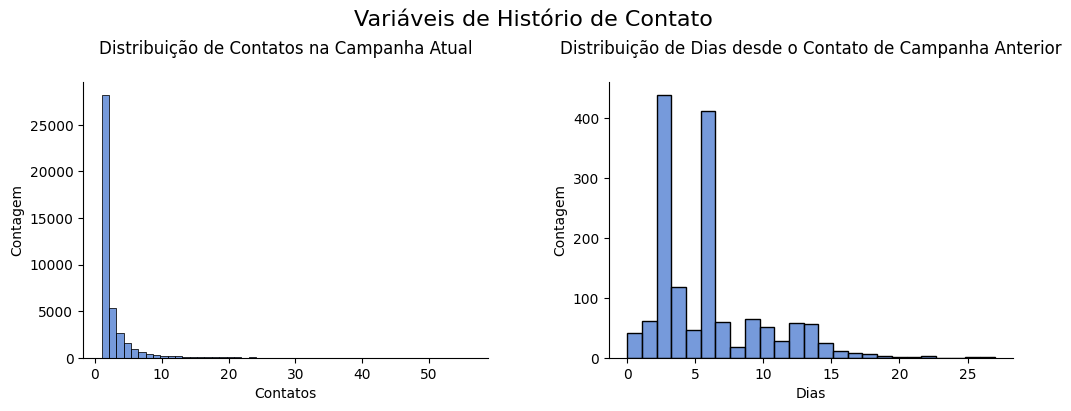

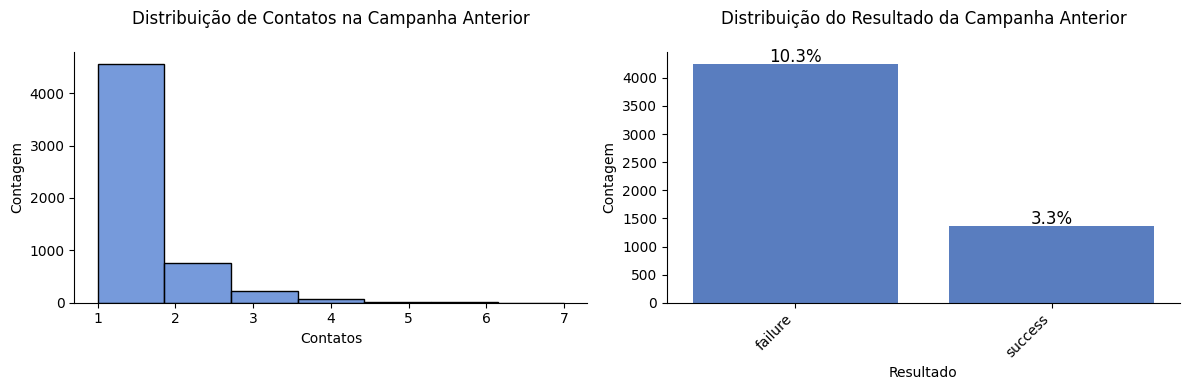

In [ ]:
#gráficos univariados de histórico de contato
#primeira linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1 = sns.histplot(df['campaign'], bins=50, kde=False, ax=axs[0])
ax1.set_title('Distribuição de Contatos na Campanha Atual', pad=20)
ax1.set_xlabel('Contatos')
ax1.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

ax1 = sns.histplot(df['pdays'], bins=25, kde=False, ax=axs[1])
ax1.set_title('Distribuição de Dias desde o Contato de Campanha Anterior', pad=20)
ax1.set_xlabel('Dias')
ax1.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

fig.suptitle('Variáveis de Histório de Contato', fontsize=16)
fig.subplots_adjust(hspace=0.8, wspace=0.3, top=0.8)

#segunda linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1 = sns.histplot(df['previous'], bins=7, kde=False, ax=axs[0])
ax1.set_title('Distribuição de Contatos na Campanha Anterior', pad=20)
ax1.set_xlabel('Contatos')
ax1.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

ax3 = sns.countplot(x='poutcome', data=df, ax=axs[1])
ax3.set_title('Distribuição do Resultado da Campanha Anterior', pad=20)
ax3.set_xlabel('Resultado')
ax3.set_ylabel('Contagem')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=45, ha='right')
sns.despine(left=False, bottom=False)

total_poutcome = len(df['poutcome'])
for p in ax3.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total_poutcome)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 30
    ax3.annotate(percentage, (x, y), ha='center', fontsize=12)

plt.tight_layout()
plt.show()

#### 5.6.3 ANÁLISES BIVARIADAS

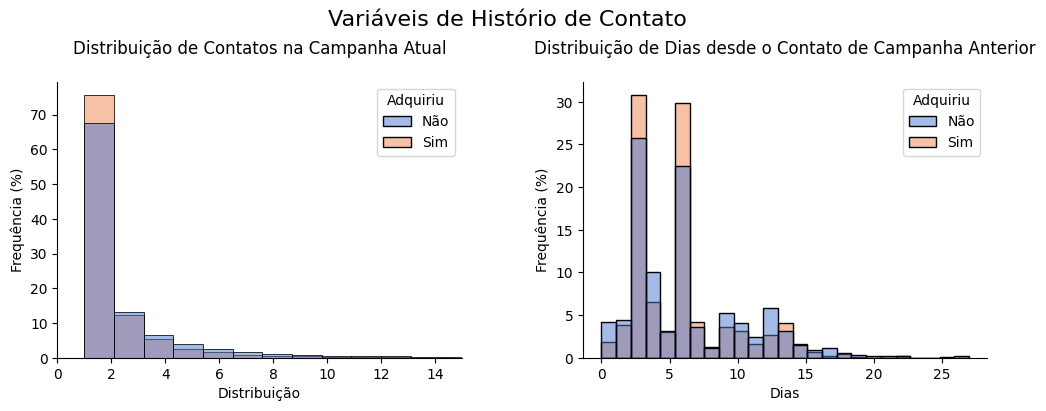

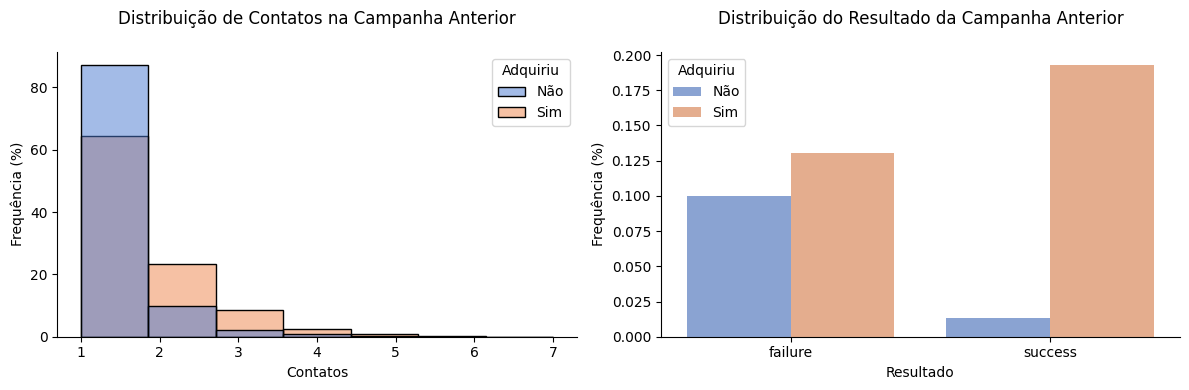

In [ ]:
#gráficos bivariados de histórico de contato
#primeira linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1 = sns.histplot(data=df, x='campaign', bins=50, hue='Adquiriu', stat="percent", common_norm=False, ax=axs[0])
ax1.set_title('Distribuição de Contatos na Campanha Atual', pad=20)
ax1.set_xlabel('Distribuição')
ax1.set_ylabel('Frequência (%)')
ax1.set_xlim(0, 15)
sns.despine(left=False, bottom=False)

ax1 = sns.histplot(data=df, x='pdays', bins=25, hue='Adquiriu', stat="percent", common_norm=False, ax=axs[1])
ax1.set_title('Distribuição de Dias desde o Contato de Campanha Anterior', pad=20)
ax1.set_xlabel('Dias')
ax1.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)

fig.suptitle('Variáveis de Histório de Contato', fontsize=16)
fig.subplots_adjust(hspace=0.8, wspace=0.3, top=0.8)

#segunda linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1 = sns.histplot(data=df, x='previous', bins=7, hue='Adquiriu', stat="percent", common_norm=False, ax=axs[0])
ax1.set_title('Distribuição de Contatos na Campanha Anterior', pad=20)
ax1.set_xlabel('Contatos')
ax1.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)

freq = (df.groupby(['poutcome','Adquiriu']).size() / df.groupby(['Adquiriu']).size()).reset_index().rename({0:'Frequência'}, axis=1)
ax3 = sns.barplot(x='poutcome', hue='Adquiriu', y='Frequência', data=freq, alpha=0.7, ax=axs[1])
ax3.set_title('Distribuição do Resultado da Campanha Anterior', pad=20)
ax3.set_xlabel('Resultado')
ax3.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)
fig.subplots_adjust(hspace=.5)

plt.tight_layout()
plt.show()

#### 5.6.4 RESULTADOS

##### Contato em Campanhas Anteriores
Somente 14% dos leads contactados já haviam sido abordados em campanhas anteriores. Destes, a maioria (10%) tinha recusado a campanha anterior. Este dado sugere que a maior parte dos leads é nova ou não foi persistentemente reabordada.

##### Número de Contatos na Campanha Atual
A média de contatos feitos por lead nesta campanha foi de 2,5, com o terceiro quartil em 3, indicando que a distribuição é deslocada para a esquerda, caracterizando uma distribuição de cauda longa. A maioria dos valores é 1, mostrando que a maior parte dos leads foi contactada apenas uma vez.

##### Intervalo entre Campanhas
Em média, os contatos desta campanha foram feitos 6 dias após o último contato da campanha anterior. Os contatos na campanha anterior foram menos numerosos do que na atual, com o terceiro quartil sendo de apenas 1 contato. Isso indica uma abordagem mais agressiva na campanha atual.

##### Eficácia do Primeiro Contato
Os clientes que adquiriram o depósito a termo fizeram isso em maior número logo após o primeiro contato. Após isso, a probabilidade de adquirir o produto diminui, o que contrasta com o comportamento observado na quantidade de contatos da campanha anterior. Este padrão indica que a eficácia das campanhas é maior nos primeiros contatos e tende a cair com contatos subsequentes.

##### Impacto da Participação em Campanhas Anteriores
De forma geral, ter participado de uma campanha anterior aumenta as chances de uma nova conversão, com maior intensidade para os clientes que fecharam a compra anteriormente. Isto sugere que leads com histórico de conversão positiva têm uma predisposição maior a responder favoravelmente a novas campanhas.

### 5.7 INDICADORES ECONÔMICOS

Na análise dos indicadores econômicos, examinamos três hipóteses principais para entender como os fatores macroeconômicos influenciam o sucesso da campanha de subscrição de depósitos a prazo:

1. **Taxa de Variação de Emprego**: Esta variável indica que, em tempos de crescimento do emprego, os consumidores podem estar mais dispostos a investir em produtos financeiros, como depósitos a prazo, devido à maior segurança econômica.

2. **Índices de Confiança do Consumidor**: A confiança do consumidor reflete a percepção dos indivíduos sobre a economia e suas finanças pessoais. Quando os consumidores estão otimistas, é mais provável que eles façam investimentos de longo prazo.

3. **Taxas Euribor de 3 Meses**: A Euribor, sendo uma taxa de referência para empréstimos interbancários na zona do euro, influencia as taxas de juros oferecidas aos consumidores. Taxas mais altas podem desincentivar a subscrição de depósitos a prazo, uma vez que os consumidores podem buscar outras formas de investimento que ofereçam melhores retornos.

Analisando esses indicadores econômicos, podemos obter insights sobre a relação entre o ambiente macroeconômico e a eficácia das campanhas de marketing para produtos financeiros, ajudando a ajustar estratégias futuras para maximizar a penetração de mercado.

#### 5.7.1 ESTATÍSTICAS DESCRITIVAS

In [ ]:
df[['emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']].describe().T

,count,mean,std,min,25%,50%,75%,max
emp.var.rate,41188.0,0.081886,1.570960,-3.400,-1.800,1.100,1.400,1.400
cons.price.idx,41188.0,93.575664,0.578840,92.201,93.075,93.749,93.994,94.767
cons.conf.idx,41188.0,-40.502600,4.628198,-50.800,-42.700,-41.800,-36.400,-26.900
euribor3m,41188.0,3.621291,1.734447,0.634,1.344,4.857,4.961,5.045
nr.employed,41188.0,5167.035911,72.251528,4963.600,5099.100,5191.000,5228.100,5228.100


#### 5.7.2 ANÁLISES UNIVARIADAS

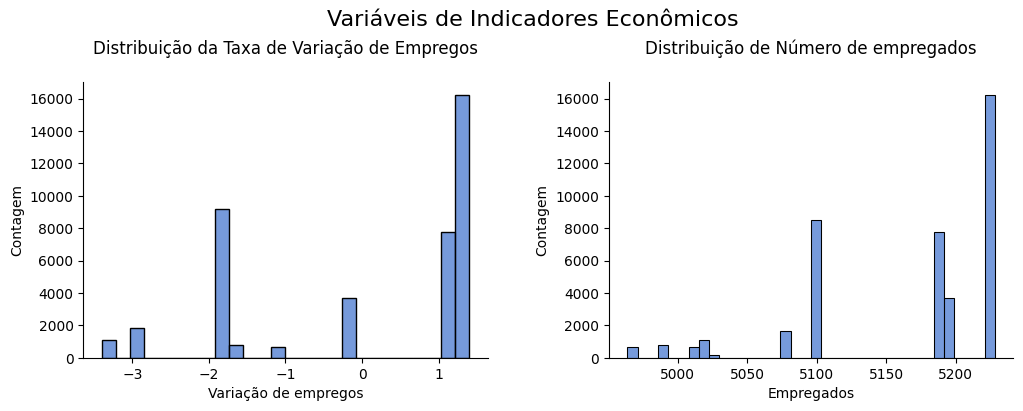

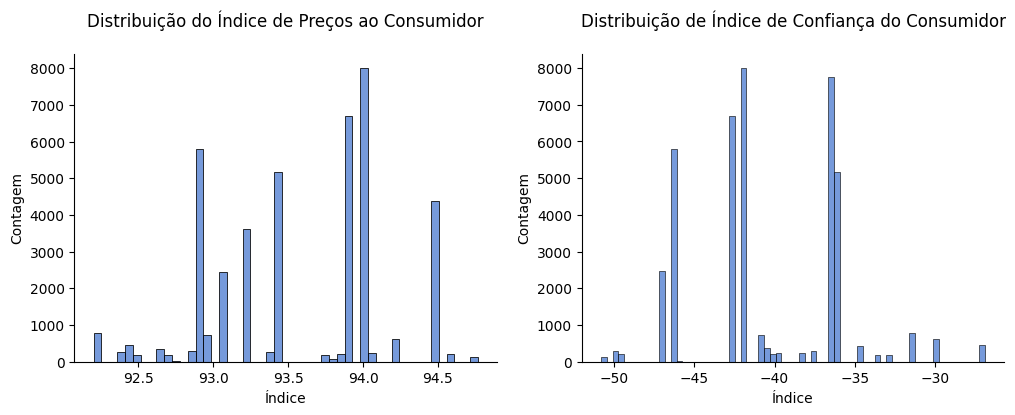

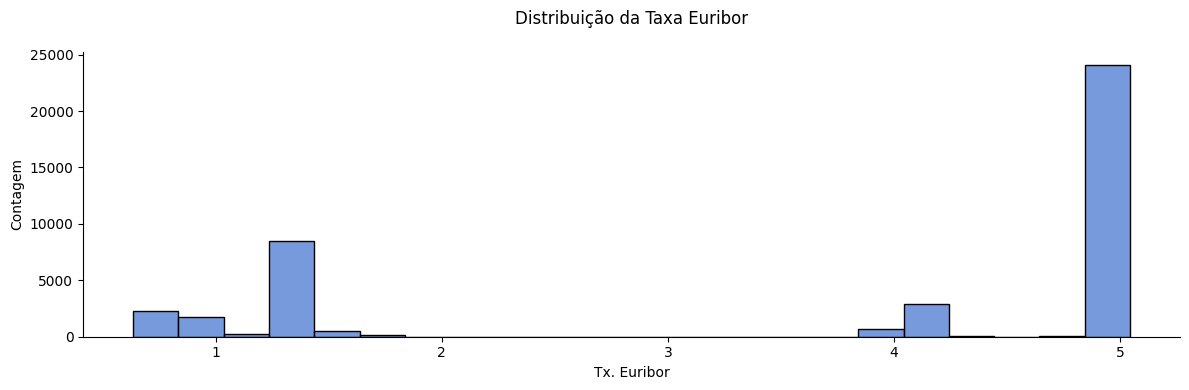

In [ ]:
#gráficos univariados de indicadores econômicos
#primeira linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1 = sns.histplot(df['emp.var.rate'], kde=False, ax=axs[0])
ax1.set_title('Distribuição da Taxa de Variação de Empregos', pad=20)
ax1.set_xlabel('Variação de empregos')
ax1.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

ax1 = sns.histplot(df['nr.employed'], kde=False, ax=axs[1])
ax1.set_title('Distribuição de Número de empregados', pad=20)
ax1.set_xlabel('Empregados')
ax1.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

fig.suptitle('Variáveis de Indicadores Econômicos', fontsize=16)
fig.subplots_adjust(hspace=0.8, wspace=0.3, top=0.8)

#segunda linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1 = sns.histplot(df['cons.price.idx'], kde=False, ax=axs[0])
ax1.set_title('Distribuição do Índice de Preços ao Consumidor', pad=20)
ax1.set_xlabel('Índice')
ax1.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

ax1 = sns.histplot(df['cons.conf.idx'], kde=False, ax=axs[1])
ax1.set_title('Distribuição de Índice de Confiança do Consumidor', pad=20)
ax1.set_xlabel('Índice')
ax1.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

#terceira linha
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
ax1 = sns.histplot(df['euribor3m'], kde=False)
ax1.set_title('Distribuição da Taxa Euribor', pad=20)
ax1.set_xlabel('Tx. Euribor')
ax1.set_ylabel('Contagem')
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

#### 5.7.3 ANÁLISES BIVARIADAS

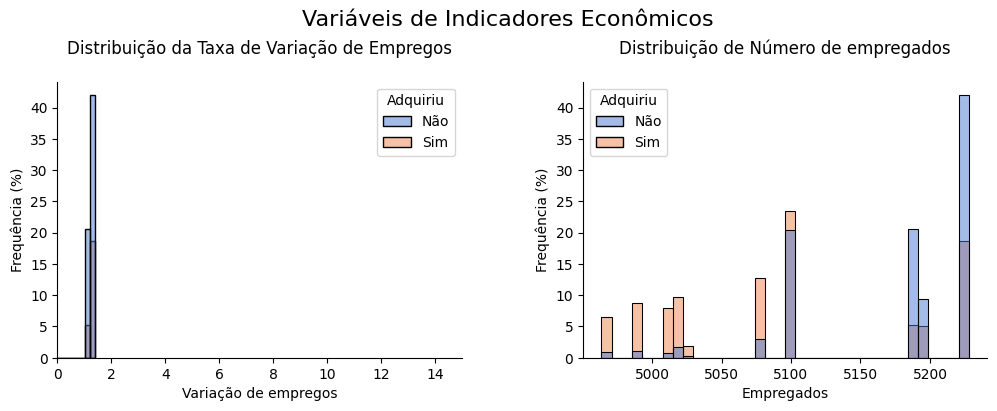

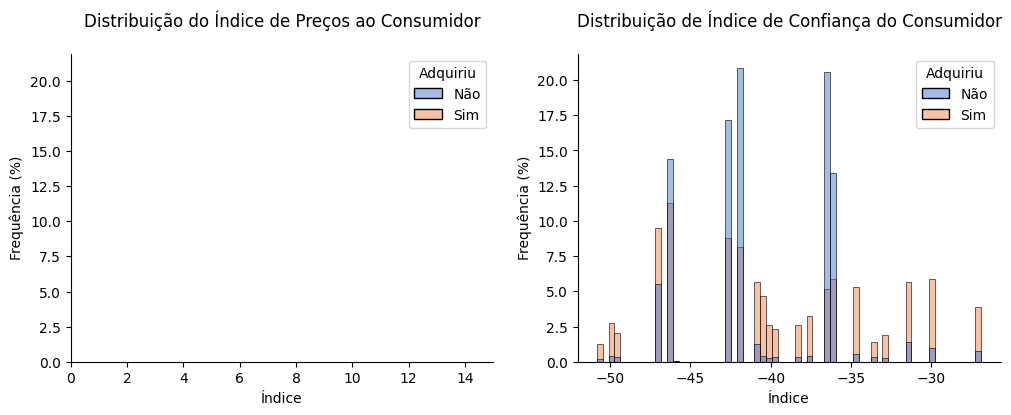

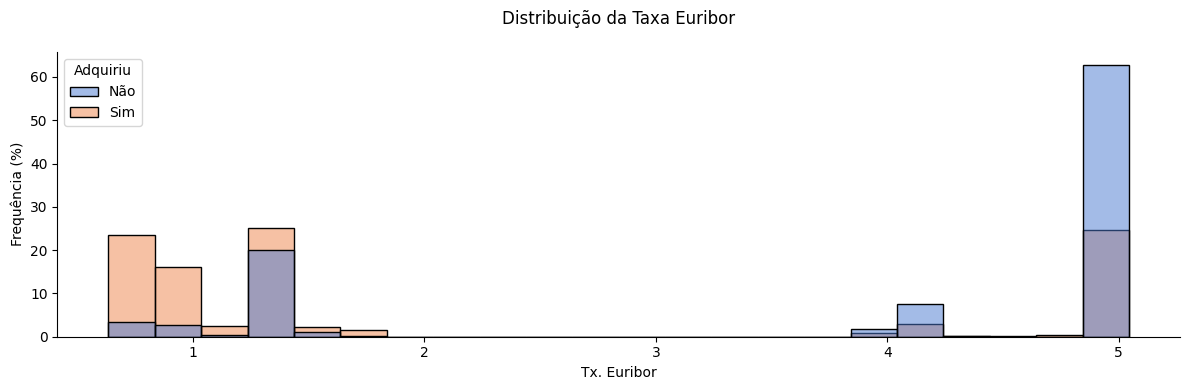

In [ ]:
#gráficos bivariados de indicadores econômicos
#primeira linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1 = sns.histplot(data=df, x='emp.var.rate', hue='Adquiriu', stat="percent", common_norm=False, ax=axs[0])
ax1.set_title('Distribuição da Taxa de Variação de Empregos', pad=20)
ax1.set_xlabel('Variação de empregos')
ax1.set_ylabel('Frequência (%)')
ax1.set_xlim(0, 15)
sns.despine(left=False, bottom=False)

ax1 = sns.histplot(data=df, x='nr.employed', hue='Adquiriu', stat="percent", common_norm=False, ax=axs[1])
ax1.set_title('Distribuição de Número de empregados', pad=20)
ax1.set_xlabel('Empregados')
ax1.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)

fig.suptitle('Variáveis de Indicadores Econômicos', fontsize=16)
fig.subplots_adjust(hspace=0.8, wspace=0.3, top=0.8)

#segunda linha
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
ax1 = sns.histplot(data=df, x='cons.price.idx', hue='Adquiriu', stat="percent", common_norm=False, ax=axs[0])
ax1.set_title('Distribuição do Índice de Preços ao Consumidor', pad=20)
ax1.set_xlabel('Índice')
ax1.set_ylabel('Frequência (%)')
ax1.set_xlim(0, 15)
sns.despine(left=False, bottom=False)

ax1 = sns.histplot(data=df, x='cons.conf.idx', hue='Adquiriu', stat="percent", common_norm=False, ax=axs[1])
ax1.set_title('Distribuição de Índice de Confiança do Consumidor', pad=20)
ax1.set_xlabel('Índice')
ax1.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)
fig.subplots_adjust(hspace=.5)

#terceira linha
fig, axs = plt.subplots(1, 1, figsize=(12, 4))
ax1 = sns.histplot(data=df, x='euribor3m', hue='Adquiriu', stat="percent", common_norm=False)
ax1.set_title('Distribuição da Taxa Euribor', pad=20)
ax1.set_xlabel('Tx. Euribor')
ax1.set_ylabel('Frequência (%)')
sns.despine(left=False, bottom=False)

plt.tight_layout()
plt.show()

#### 5.7.4 RESULTADOS

##### Taxa EURIBOR e Conversão de Campanha
Observou-se que, em geral, uma taxa EURIBOR mais baixa está associada a uma maior taxa de conversão da campanha. Quanto aos outros índices, não foi identificada uma relação clara com a conversão.

Para uma compreensão mais detalhada dos outros indicadores, seria necessário realizar uma análise mais granular, utilizando dados diários no momento do contato dos leads, a fim de capturar relações mais precisas e informar estratégias de campanha mais eficazes.

## 6. ANÁLISE DE CORRELAÇÃO


Para realizar a análise de correlação das variáveis, precisaremos codificar as variáveis categóricas. Para esta etapa, utilizaremos a codificação dummy temporariamente. Posteriormente, durante a preparação dos dados, avaliaremos a melhor abordagem para este tratamento.

In [ ]:
del df['Adquiriu']

In [ ]:
df['housing'] = df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['housing'].value_counts()

housing
1    21576
0    19612
Name: count, dtype: int64

In [ ]:
df['loan'] = df['loan'].apply(lambda x: 1 if x == 'yes' else 0)
df['loan'].value_counts()

loan
0    34940
1     6248
Name: count, dtype: int64

In [ ]:
df['y'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)
df['y'].value_counts()

y
0    36548
1     4640
Name: count, dtype: int64

In [ ]:
#dummy encoding
cols_to_encode = ['job', 'marital', 'education', 'default', 'contact',
                  'month', 'day_of_week', 'poutcome', 'generation',
                  'job_category', 'education_category']

df = pd.get_dummies(df, columns=cols_to_encode)

df.head()

,age,housing,loan,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,job_NA,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_NA,marital_divorced,marital_married,marital_single,education_NA,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,default_NA,default_no,default_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_success,generation_Gen_Boomer,generation_Gen_Silent,generation_Gen_X,generation_Gen_Y,job_category_Autônomos,job_category_NA,job_category_Não Empregados,job_category_Profissionais de Escritório,job_category_Trabalhadores Manuais,education_category_Educação Básica,education_category_Ensino Médio,education_category_Ensino Superior,education_category_NA,education_category_Profissionalizante
0,56,0,0,261.0,1,NaN,NaN,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,True,False,False,False,False
1,57,0,0,149.0,1,NaN,NaN,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False
2,37,1,0,226.0,1,NaN,NaN,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False
3,40,0,0,151.0,1,NaN,NaN,1.1,93.994,-36.4,4.857,5191.0,0,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False,False,True,False,True,False,False,False,False
4,56,0,1,307.0,1,NaN,NaN,1.1,93.994,-36.4,4.857,5191.0,0,False,False,False,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True,False,False,False,False,False,True,False,False,False,False,False,False,False,True,False,True,False,False,False


In [ ]:
#matriz de correlação
corr_matrix = df.corr()

plt.figure(figsize=(60, 60))

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Matriz de Correlação')
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
#obtendo as maiores correlações
corr_df = pd.DataFrame(corr_matrix)
columns_to_drop = [col for col in corr_df.columns if 'category' in col]
corr_df = corr_df.drop(columns=columns_to_drop, index=columns_to_drop)
columns_to_drop = [col for col in corr_df.columns if 'generation' in col]
corr_df = corr_df.drop(columns=columns_to_drop, index=columns_to_drop)

highest_corr = (corr_df.abs().where(np.triu(np.ones(corr_df.shape), k=1).astype(bool))
                        .stack().sort_values(ascending=False))

display(highest_corr.head(30))

contact_cellular       contact_telephone                1.000000
default_NA             default_no                       0.999780
emp.var.rate           euribor3m                        0.972245
euribor3m              nr.employed                      0.945154
emp.var.rate           nr.employed                      0.906970
                       cons.price.idx                   0.775334
marital_married        marital_single                   0.773785
cons.price.idx         euribor3m                        0.688230
                       contact_telephone                0.591474
                       contact_cellular                 0.591474
                       nr.employed                      0.522034
job_technician         education_professional.course    0.484617
cons.price.idx         month_jun                        0.445513
cons.conf.idx          month_aug                        0.445243
age                    job_retired                      0.440772
marital_divorced       ma

In [ ]:
display(corr_df['y'].drop('y').abs().sort_values(ascending=False).head(20))

duration             0.405224
nr.employed          0.354678
poutcome_success     0.316269
euribor3m            0.307771
emp.var.rate         0.298334
previous             0.243823
contact_telephone    0.144773
contact_cellular     0.144773
month_mar            0.144014
month_oct            0.137366
cons.price.idx       0.136211
month_sep            0.126067
month_may            0.108271
default_no           0.099344
default_NA           0.099293
job_student          0.093955
job_retired          0.092221
month_dec            0.079303
month_apr            0.076136
job_blue-collar      0.074423
Name: y, dtype: float64

In [ ]:
display(corr_df['default_NA'].drop('default_NA').abs().sort_values(ascending=False).head(10))

default_no                     0.999780
emp.var.rate                   0.203218
euribor3m                      0.195251
nr.employed                    0.189728
job_blue-collar                0.176698
cons.price.idx                 0.168322
age                            0.165001
education_basic.4y             0.163754
education_university.degree    0.142701
contact_telephone              0.135604
Name: default_NA, dtype: float64

In [ ]:
display(corr_df['education_NA'].drop('education_NA').abs().sort_values(ascending=False).head(10))

job_NA                           0.158978
education_university.degree      0.135627
education_high.school            0.114801
job_student                      0.109278
education_basic.9y               0.086869
education_professional.course    0.079994
education_basic.4y               0.070355
age                              0.069485
previous                         0.065126
pdays                            0.058656
Name: education_NA, dtype: float64

Esta análise fornece uma visão clara das relações entre variáveis e destaca a estratégia de manejo de multicolinearidade, ao mesmo tempo que identifica os principais fatores que influenciam o comportamento dos leads.

- **Euribor3m**: Este índice pode ser utilizado para substituir outros índices, pois apresentou uma forte correlação com a maioria deles. Isso pode ajudar a mitigar problemas de multicolinearidade, simplificando o modelo e mantendo sua eficácia.
- **Duration**: Observamos um vazamento de informações desta variável para a variável dependente do problema. Este comportamento já era conhecido e, por isso, a variável será removida durante a modelagem para evitar vieses e assegurar a integridade dos resultados.
- **Outras correlações**: As demais correlações identificadas estão dentro do esperado e, a princípio, não devem prejudicar a performance do modelo. Elas serão monitoradas, mas não representam um obstáculo significativo para a modelagem.
- **Principais variáveis correlacionadas com a conversão da campanha**: As variáveis que mostraram maior correlação com a probabilidade de um lead fechar negócio incluem a taxa euribor, ter sido contactado anteriormente em outra campanha, o mês de contato, a ausência de inadimplência anterior e a ocupação do cliente.


### 7. CONCLUSÕES E RECOMENDAÇÕES

A campanha de marketing do banco europeu obteve resultados positivos, com uma taxa de conversão de 11%, correspondente a aproximadamente 4,6 mil novos clientes. Este desempenho, apesar de variado entre diferentes segmentos e métodos de contato, fornece insights valiosos para otimização futura.

#### Quick Insights Acionáveis

1. **Otimização do Público-Alvo**:
   - Segmentar leads com maior potencial de conversão, especialmente jovens e aposentados, que mostraram melhor desempenho.
   - Focar em leads com histórico positivo de participação em campanhas anteriores, pois têm maior propensão a converter novamente.

2. **Métodos de Contato**:
   - Priorizar contatos via celular, que apresentaram uma taxa de conversão significativamente superior em comparação ao telefone fixo.

3. **Timing e Frequência de Contatos**:
   - Concentrar esforços no primeiro contato, onde a probabilidade de conversão é maior, e evitar múltiplos contatos com o mesmo lead, que demonstram uma eficácia reduzida.

4. **Segmentação Ocupacional**:
   - Focar em indivíduos em funções administrativas e estudantes, que demonstraram boas taxas de conversão, ajustando a abordagem de acordo com o perfil ocupacional.

5. **Educação e Estado Civil**:
   - Direcionar campanhas para indivíduos com ensino superior, que apresentaram maior sucesso.
   - Desenvolver estratégias específicas para solteiros, que tiveram a melhor taxa de conversão entre os estados civis analisados.

#### Propostas de Soluções

1. **Modelo de Propensão à Conversão**:
   - Desenvolver um modelo preditivo para identificar leads com maior propensão a converter, utilizando variáveis como histórico de campanhas, idade, ocupação e método de contato preferido. Este modelo pode ser integrado ao CRM para priorizar esforços de venda e marketing.

2. **Segmentação de Clientes**:
   - Implementar uma segmentação avançada dos clientes baseada em dados demográficos, comportamentais e transacionais. Essa segmentação permitirá a criação de campanhas mais personalizadas e eficientes, ajustando as mensagens e ofertas de acordo com o perfil de cada segmento.

3. **Otimizador de Campanha**:
   - Desenvolver um sistema de otimização de campanhas que ajuste automaticamente os parâmetros (como frequência de contato, canal de comunicação e timing) com base no desempenho histórico e nos dados em tempo real para maximizar a taxa de conversão e o retorno sobre investimento.

#### Conclusão

As análises conduzidas na etapa de compreensão dos dados fornecem uma base sólida para a tomada de decisões estratégicas em futuras campanhas de marketing. Com a implementação das recomendações e soluções propostas, o banco pode não apenas melhorar suas taxas de conversão, mas também otimizar seus recursos e aumentar significativamente o retorno sobre investimento das campanhas de marketing.